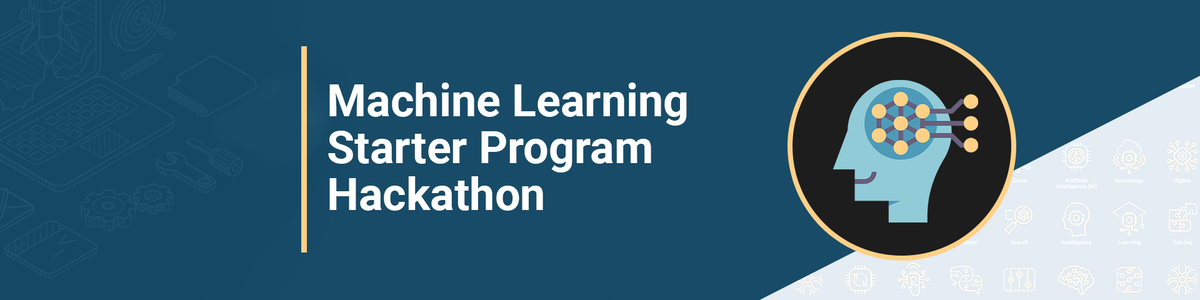

In [391]:
'''Identify the Sentiments'''

from PIL import Image
read_image=Image.open('/home/kumar/Documents/Machine Learning Starter Program Hackathon/ml_starter_pack-thumbnail-1200x1200.png')
read_image

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Machine Learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report


#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [268]:
df=pd.read_csv('/home/kumar/Documents/Machine Learning Starter Program Hackathon/train_HK6lq50.csv')
df.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [269]:
df2=pd.read_csv('/home/kumar/Documents/Machine Learning Starter Program Hackathon/test_wF0Ps6O.csv')
df2.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [270]:
df_id=df['id']

In [271]:
df2_id=df2['id']

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


In [273]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
id                           31349 non-null object
program_id                   31349 non-null object
program_type                 31349 non-null object
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null object
difficulty_level             31349 non-null object
trainee_id                   31349 non-null int64
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          19558 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null object
trainee_engagement_rating    31318 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.6+ MB


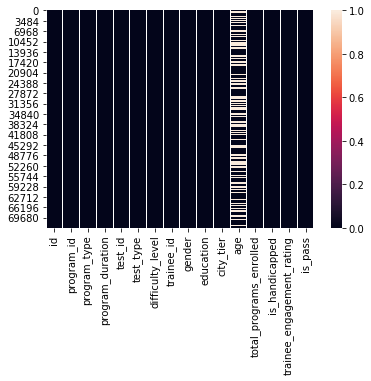

<Figure size 1080x432 with 0 Axes>

In [274]:
sns.heatmap(df.isna())
plt.figure(figsize=(15,6))
plt.tight_layout()

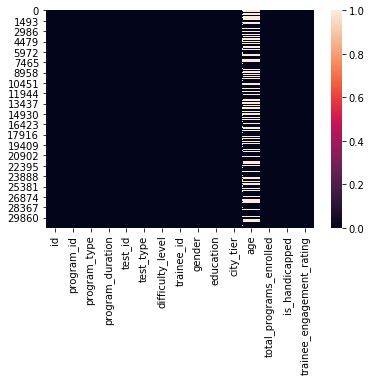

<Figure size 1080x432 with 0 Axes>

In [275]:
sns.heatmap(df2.isna())
plt.figure(figsize=(15,6))
plt.tight_layout()

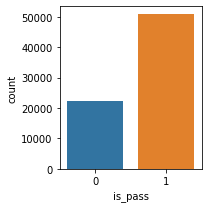

In [276]:
plt.figure(figsize=(4,4))
sns.countplot(df['is_pass'])
plt.tight_layout()

In [277]:
y=df['is_pass']

In [278]:
df=df.drop('program_id',axis=1)

In [279]:
df2=df2.drop('program_id',axis=1)

In [280]:
df.program_type.value_counts()

Y    22560
T    18458
V    13025
U     7821
Z     6629
X     3328
S     1326
Name: program_type, dtype: int64

In [281]:
df2.program_type.value_counts()

Y    9744
T    7903
V    5569
U    3392
Z    2708
X    1400
S     633
Name: program_type, dtype: int64

In [282]:
df['test_type'].value_counts()

offline    43543
online     29604
Name: test_type, dtype: int64

In [283]:
df['test_type']=df['test_type'].map({'offline':0,'online':1})

In [284]:
df2['test_type'].value_counts()

offline    18713
online     12636
Name: test_type, dtype: int64

In [285]:
df2['test_type']=df2['test_type'].map({'offline':0,'online':1})

In [286]:
df['gender']=df['gender'].map({'M':1,'F':0})

In [287]:
df2['gender']=df2['gender'].map({'M':1,'F':0})

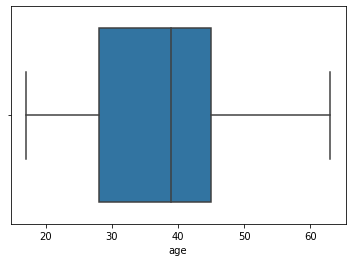

In [288]:
sns.boxplot(df['age'])

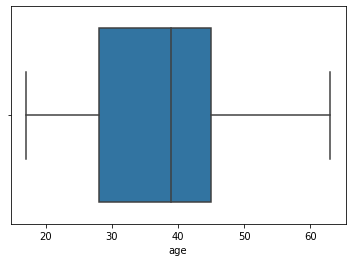

In [289]:
sns.boxplot(df2['age'])

In [290]:
df['age'].describe()

count    45418.000000
mean        36.494033
std          9.041119
min         17.000000
25%         28.000000
50%         39.000000
75%         45.000000
max         63.000000
Name: age, dtype: float64

In [291]:
df2['age'].describe()

count    19558.000000
mean        36.440894
std          9.055208
min         17.000000
25%         28.000000
50%         39.000000
75%         45.000000
max         63.000000
Name: age, dtype: float64

In [292]:
df['age'].isnull().sum()

27729

In [293]:
df2['age'].isnull().sum()

11791

In [294]:
df=df.drop('age',axis=1)
df2=df2.drop('age',axis=1)

In [295]:
df['is_handicapped'].value_counts()

N    66577
Y     6570
Name: is_handicapped, dtype: int64

In [296]:
df2['is_handicapped'].value_counts()

N    28670
Y     2679
Name: is_handicapped, dtype: int64

In [297]:
df['is_handicapped']=df.is_handicapped.map({'N':0,'Y':1})

In [298]:
df2['is_handicapped']=df2.is_handicapped.map({'N':0,'Y':1})

In [299]:
df.program_type.value_counts()

Y    22560
T    18458
V    13025
U     7821
Z     6629
X     3328
S     1326
Name: program_type, dtype: int64

In [300]:
df2.program_type.value_counts()

Y    9744
T    7903
V    5569
U    3392
Z    2708
X    1400
S     633
Name: program_type, dtype: int64

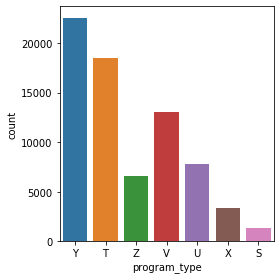

In [301]:
plt.figure(figsize=(4,4))
sns.countplot(df['program_type'])
plt.tight_layout()

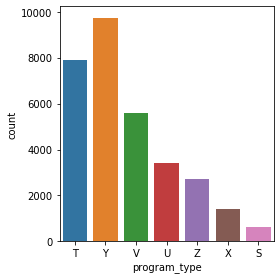

In [302]:
plt.figure(figsize=(4,4))
sns.countplot(df2['program_type'])
plt.tight_layout()

In [303]:
df['program_type'].value_counts()

Y    22560
T    18458
V    13025
U     7821
Z     6629
X     3328
S     1326
Name: program_type, dtype: int64

In [304]:
df['program_type']=df['program_type'].map({'Y':0,'T':1,'V':2,'U':3,'Z':4,'X':5,'S':6})

In [305]:
df2['program_type'].value_counts()

Y    9744
T    7903
V    5569
U    3392
Z    2708
X    1400
S     633
Name: program_type, dtype: int64

In [306]:
df2['program_type']=df2['program_type'].map({'Y':0,'T':1,'V':2,'U':3,'Z':4,'X':5,'S':6})

In [307]:
df['difficulty_level'].value_counts()

easy            40101
intermediate    20668
hard            10297
vary hard        2081
Name: difficulty_level, dtype: int64

In [308]:
df2['difficulty_level'].value_counts()

easy            17110
intermediate     8869
hard             4480
vary hard         890
Name: difficulty_level, dtype: int64

In [309]:
df['difficulty_level']=df['difficulty_level'].map({'easy':0,'intermediate':1,'hard':2,'vary hard':3})

In [310]:
df2['difficulty_level']=df2['difficulty_level'].map({'easy':0,'intermediate':1,'hard':2,'vary hard':3})

In [311]:
df['education'].value_counts()

High School Diploma    34371
Matriculation          26169
Bachelors              11581
No Qualification         514
Masters                  512
Name: education, dtype: int64

In [312]:
df2['education'].value_counts()

High School Diploma    14612
Matriculation          11263
Bachelors               5009
Masters                  242
No Qualification         223
Name: education, dtype: int64

In [313]:
df['education']=df['education'].map({'High School Diploma':2,
                                     'Matriculation':1,
                                     'Bachelors':3,
                                     'Masters':4,
                                     'No Qualification':0})

In [314]:
df2['education']=df2['education'].map({'High School Diploma':2,
                                     'Matriculation':1,
                                     'Bachelors':3,
                                     'Masters':4,
                                     'No Qualification':0})

In [315]:
df=df.drop('id',axis=1)
df2=df2.drop('id',axis=1)

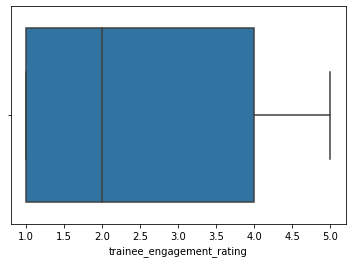

In [347]:
sns.boxplot(df['trainee_engagement_rating'])

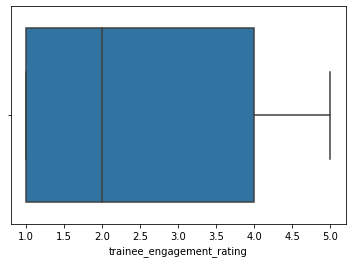

In [348]:
sns.boxplot(df2['trainee_engagement_rating'])

In [349]:
df['trainee_engagement_rating']=df['trainee_engagement_rating'].fillna(value=1.0)
df2['trainee_engagement_rating']=df2['trainee_engagement_rating'].fillna(value=1.0)

In [350]:
df['trainee_engagement_rating'].value_counts()

1.0    25672
2.0    17234
4.0    13113
3.0    11553
5.0     5575
Name: trainee_engagement_rating, dtype: int64

In [351]:
df2['trainee_engagement_rating'].value_counts()

1.0    10983
2.0     7402
4.0     5728
3.0     4799
5.0     2437
Name: trainee_engagement_rating, dtype: int64

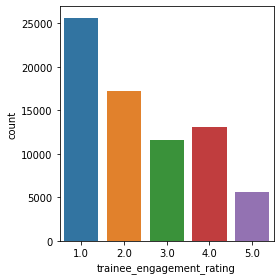

In [352]:
plt.figure(figsize=(4,4))
sns.countplot(df['trainee_engagement_rating'])
plt.tight_layout()

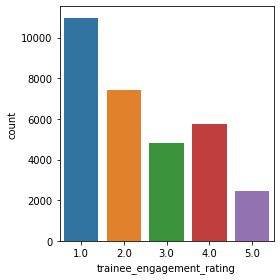

In [353]:
plt.figure(figsize=(4,4))
sns.countplot(df2['trainee_engagement_rating'])
plt.tight_layout()

In [354]:
df.head()

,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,0,136,150,0,1,9389,1,1,3,5,0,1.0,0
1,1,131,44,0,0,16523,0,2,4,2,0,3.0,1
2,4,120,178,1,0,13987,1,1,1,1,0,2.0,1
3,1,117,32,0,0,13158,0,1,3,4,0,1.0,1
4,2,131,84,0,1,10591,0,2,1,2,0,4.0,1


In [355]:
df2.head()

,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1,131,45,0,1,1626,0,1,3,2,0,4.0
1,0,135,130,1,0,11020,1,3,3,4,0,4.0
2,0,120,146,1,0,12652,1,1,3,2,0,3.0
3,2,122,72,0,3,7038,0,2,1,2,0,2.0
4,2,122,71,0,1,888,0,1,3,2,0,2.0


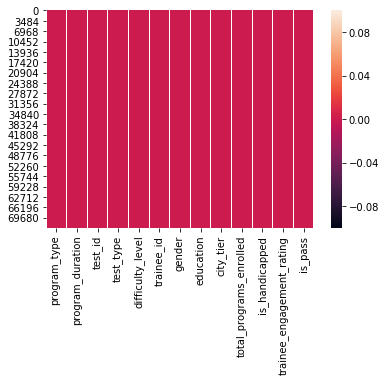

<Figure size 1080x432 with 0 Axes>

In [356]:
sns.heatmap(df.isna())
plt.figure(figsize=(15,6))
plt.tight_layout()

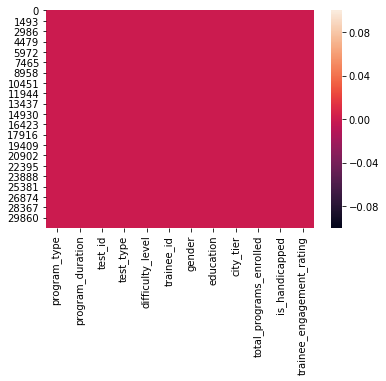

<Figure size 1080x432 with 0 Axes>

In [357]:
sns.heatmap(df2.isna())
plt.figure(figsize=(15,6))
plt.tight_layout()

In [358]:
x=df.drop('is_pass',axis=1).values
y=df['is_pass'].values

In [359]:
x.shape,y.shape

((73147, 12), (73147,))

In [360]:
from sklearn.preprocessing import MinMaxScaler

In [361]:
scaler=MinMaxScaler()

In [362]:
x_train=scaler.fit_transform(x_train)

In [363]:
x_test=scaler.transform(x_test)

In [364]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [365]:
x

array([[  0., 136., 150., ...,   5.,   0.,   1.],
       [  1., 131.,  44., ...,   2.,   0.,   3.],
       [  4., 120., 178., ...,   1.,   0.,   2.],
       ...,
       [  0., 120., 142., ...,   3.,   0.,   4.],
       [  2., 131.,  82., ...,   2.,   0.,   2.],
       [  0., 121., 119., ...,   2.,   0.,   4.]])

In [366]:
from sklearn.pipeline import Pipeline

In [367]:
pipeline_lr=Pipeline([('scaler1',StandardScaler()),
                      ('lr_classifier',LogisticRegression(random_state=101))])

In [368]:
pipeline_svc=Pipeline([('scaler2',StandardScaler()),
                      ('svc_classifier',SVC(random_state=101))])

In [369]:
pipeline_dt=Pipeline([('scaler3',StandardScaler()),
                      ('dt_classifier',DecisionTreeClassifier(random_state=101))])

In [370]:
pipeline_rf=Pipeline([('scaler4',StandardScaler()),
                      ('rf_classifier',RandomForestClassifier(random_state=101))])

In [371]:
pipeline_xgb=Pipeline([('scaler5',StandardScaler()),
                      
                      ('xgb_classifier',XGBClassifier(random_state=101))])

In [372]:
pipelines=[pipeline_lr,pipeline_svc,pipeline_dt,pipeline_rf,pipeline_xgb]

In [373]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [374]:
pipe_dic={0:'logistic regression',1:'SVC',2:'Decision Tree',3:'Random Forest',4:'XGBoost'}

for pipe in pipelines:
    pipe.fit(x_train,y_train)

In [375]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: \t {}".format(pipe_dic[i],model.score(x_test,y_test)))

logistic regression Test Accuracy: 	 0.7072681704260652
SVC Test Accuracy: 	 0.7207108680792891
Decision Tree Test Accuracy: 	 0.696559580770107
Random Forest Test Accuracy: 	 0.7106402369560264
XGBoost Test Accuracy: 	 0.7411711095921623


In [376]:
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy score:{}'.format(pipe_dic[best_classifier]))

Classifier with best accuracy score:XGBoost


In [381]:
xgb_pred=pipeline_xgb.predict(x_test)
xgb_pred

array([1, 1, 1, ..., 1, 1, 1])

In [382]:
classification_xgb = classification_report(xgb_pred,y_test)
print(classification_xgb)

              precision    recall  f1-score   support

           0       0.37      0.63      0.47      3905
           1       0.91      0.76      0.83     18040

    accuracy                           0.74     21945
   macro avg       0.64      0.70      0.65     21945
weighted avg       0.81      0.74      0.76     21945



In [383]:
xgb_pred2=pipeline_xgb.predict(df2)
xgb_pred2

array([1, 1, 1, ..., 1, 0, 1])

In [385]:
data=df2_id

In [386]:

dataset = pd.DataFrame({'id': data, 'is_pass': xgb_pred2})

In [389]:
dataset.head()

,id,is_pass
0,1626_45,1
1,11020_130,1
2,12652_146,1
3,7038_72,0
4,888_71,0


In [390]:
dataset.to_csv('/home/kumar/Desktop/Submission_Kumar_Gaurav.csv')